In [ ]:
!git clone https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion.git


Cloning into 'Emotion-Dataset-from-Indonesian-Public-Opinion'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 321.63 KiB | 5.74 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
import os

# List all files in the content directory to check for your downloaded files
print(os.listdir('/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion'))

['AngerData.csv', 'LoveData.csv', 'JoyData.csv', 'FearData.csv', 'SadData.csv', 'NeutralData.csv']


In [ ]:
import pandas as pd

# Ganti dengan path ke file CSV Anda
file_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/AngerData.csv'

# Baca file CSV dengan delimiter tab
data = pd.read_csv(file_path, delimiter='\t')

# Tampilkan isi file CSV
print(data.head())

                                               Tweet  Label
0                        pagi2 udah di buat emosi :)  Anger
1  kok stabilitas negara, memange 10 thn negara t...  Anger
2                       dah lah emosi mulu liat emyu  Anger
3  aib? bodoh benar! sebelum kata aib itu muncul,...  Anger
4                            dih lu yg nyebelin bego  Anger


In [ ]:
import pandas as pd

# Definisikan path untuk setiap file
file_paths = {
    'Anger': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/AngerData.csv',
    'Fear': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/FearData.csv',
    'Joy': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/JoyData.csv',
    'Love': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/LoveData.csv',
    'Neutral': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/NeutralData.csv',
    'Sad': '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/dataset/SadData.csv'
}

# Gabungkan semua data ke dalam satu DataFrame
dataframes = []
for emotion, file_path in file_paths.items():
    df = pd.read_csv(file_path, delimiter='\t')
    df['Label'] = emotion  # Tambahkan kolom label berdasarkan emosi
    dataframes.append(df)

# Menggabungkan semua dataframes
data = pd.concat(dataframes, ignore_index=True)

# Lihat beberapa baris awal untuk memastikan data sudah benar
print(data.tail())


                                                  Tweet Label
7075  pagi saat seisi semesta sujud pada zat yg acap...   Sad
7076  meski engkau yg pergi, meski engkau yg meningg...   Sad
7077                     udah biasa kalah dan tersakiti   Sad
7078  apakabar ku?. apakah baik-baik saja,, tidak, a...   Sad
7079      this user sdg tidak.baik.baik saja sdg stress   Sad


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Pastikan Anda sudah mengunduh stopwords dan tokenizer NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Inisialisasi stopwords dan lemmatizer
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

# Fungsi untuk membersihkan teks
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Menghapus karakter non-kata
    text = text.lower()  # Mengubah teks menjadi lowercase
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization dan stopwords removal
    return ' '.join(tokens)

# Terapkan preprocessing ke seluruh kolom 'Tweet'
data['Tweet'] = data['Tweet'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode label
encoder = LabelEncoder()
data['Label'] = encoder.fit_transform(data['Label'])  # Encode label emosi menjadi angka

# Tokenizer dan padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Tweet'])
sequences = tokenizer.texts_to_sequences(data['Tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # Panjang sequence maksimum


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(6, activation='softmax')  # 6 kelas emosi
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pisahkan data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['Label'], test_size=0.2, random_state=42)

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.3030 - loss: 1.6700 - val_accuracy: 0.5141 - val_loss: 1.2239
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.6871 - loss: 0.9308 - val_accuracy: 0.6384 - val_loss: 0.9854
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 42s 199ms/step - accuracy: 0.8059 - loss: 0.5980 - val_accuracy: 0.6653 - val_loss: 0.9884
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 39s 188ms/step - accuracy: 0.8756 - loss: 0.4104 - val_accuracy: 0.6561 - val_loss: 1.1163
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - accuracy: 0.9095 - loss: 0.2992 - val_accuracy: 0.6490 - val_loss: 1.2428
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 42s 194ms/step - accuracy: 0.9361 - loss: 0.2210 - val_accuracy: 0.6356 - val_loss: 1.3660
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.9454 - loss: 0.1856 - val_accuracy: 0.6264 - val_loss: 1.4862
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.9532 - loss: 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict_emotion(text):
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)[0]

    # Tampilkan grafik persentase
    emotions = encoder.classes_  # Nama kelas emosi
    plt.figure(figsize=(10, 6))
    plt.bar(emotions, prediction * 100)
    plt.xlabel('Emosi')
    plt.ylabel('Persentase (%)')
    plt.title('Prediksi Emosi')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


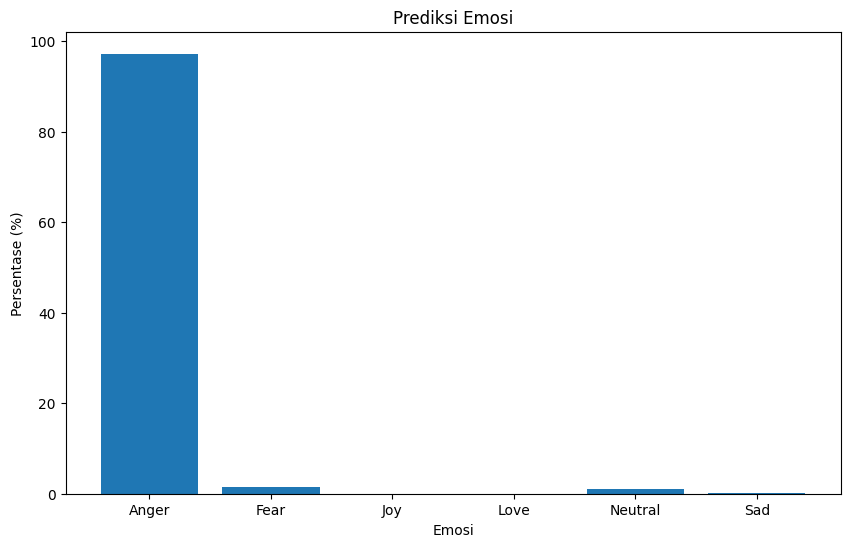

In [ ]:
predict_emotion("hari ni panas banget sih")

In [ ]:
# Simpan model dalam format HDF5
model.save('emotion_model.h5')


In [ ]:
# Simpan model dalam format Keras native
model.save('emotion_model.keras')


In [ ]:
import pickle

# Assuming 'tokenizer' is the Tokenizer object you used for training
# and 'encoder' is the LabelEncoder object for encoding emotion labels

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)
